# Lesson: Building a Decision Tree and a logistic regression with scikit-learn

<img style = "float: center" src = "https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc" width = "700"/>


[Time; 45 minutes]

* **Learning objective 1:** Data wrangling in Python
* **Learning objective 2:** How to build a classification decision tree with scikit-learn
* **Learning objective 3:** How to predict with scikit learn?
* **Learning objective 4:** How to evaluate a classification decision tree model?
* **Learning objective 5:** How to apply the model?
* **Learning objective 6:** How to do regression trees in Python?
* **Learning objective 7:** How to evaluate a regression tree model?
* **Learning objective 8:** How to prune a tree with scikit-learn?
* **Learning objective 9:** Understand 'gini' and 'entropy'
* **Learning objective 10:** How to build a logistic regression with scikit-learn
* **Learning objective 11:** How to predict with the logistic regression?

The dataset is the [wine quality data](https://www.kaggle.com/rajyellow46/wine-quality)

### [Learning objective 1] Use Pandas to do data preparation

In [1]:
import numpy as np
import pandas as pd
path = 'C:/Users/Administrator/Desktop/CU/CU_SM2022/APANPS5420_001_2022_2-ANOMALYDETECTION/3'
df = pd.read_csv(path + '/winequalityN.csv')
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<AxesSubplot:>

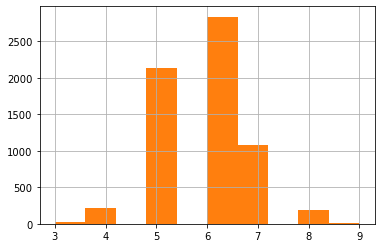

In [2]:
df['quality'].hist()
df.quality.hist()

- The above code is supposed to print a histogram. But it is not presented. Why?
- Use %matplotlib inline

<AxesSubplot:>

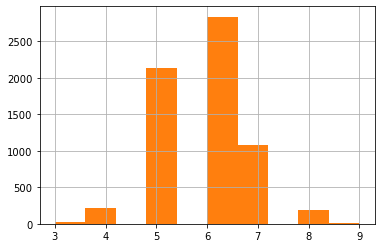

In [3]:
%matplotlib inline
df['quality'].hist()
df.quality.hist()

In [4]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [5]:
df['target'] =np.where(df['quality']>=8,1,0)
df['red_wine'] = np.where(df['type']=='red',1,0)

In [6]:
df['target'].value_counts()

0    6299
1     198
Name: target, dtype: int64

In [7]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'target', 'red_wine'],
      dtype='object')

In [8]:
features = [ 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'red_wine']

In [9]:
df.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target,red_wine
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
missing_values = df.isnull().sum()
missing_values

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
target                   0
red_wine                 0
dtype: int64

In [11]:
missing_values_per = (df.isnull().sum() / df.isnull().count())
missing_values_per

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
target                  0.000000
red_wine                0.000000
dtype: float64

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [13]:
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,type,0,0.000000
1,fixed acidity,10,0.001539
2,volatile acidity,8,0.001231
3,citric acid,3,0.000462
4,residual sugar,2,0.000308
5,chlorides,2,0.000308
6,free sulfur dioxide,0,0.000000
7,total sulfur dioxide,0,0.000000
8,density,0,0.000000
9,pH,9,0.001385


In [14]:
def null_cell(df):
    dfx = df.copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df))#.index
fill_list

,the_null,the_null_perc
fixed acidity,10,0.001539
pH,9,0.001385
volatile acidity,8,0.001231
sulphates,4,0.000616
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308


* Pandas uses .loc to locate elements in a data frame. Click [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) for references.
* The following block first finds the columns with missing values: df_mean.loc[:,col]
* For now we just fillna() to impute the missing values with the average values.
* Use the for-loop function to impute missing values for those columns

In [15]:
r.loc[r['index']=='type','Percentage']

0    0.0
Name: Percentage, dtype: float64

In [18]:
df_mean = df # Do you know this is different from "df_mean = df.copy()?"" This just point to the same data frame. It does not create a copy.
df_mean = df.copy() # Here create a physical copy of df.

In [19]:
for col in fill_list.index:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)

### [Learning objective 2] How does it work? Let's build a decision tree in Python

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_mean[features],
                                                    df_mean['target'], 
                                                    random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model. 
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

In [22]:
# Then, train the model.
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

#### A few important hyperparameters:
(1) Criterion:
* Define the function to measure the quality of a split. There are two options: "gini" for the Gini impurity and "entropy" for the information gain.
* The default is "gini"

(2) Splitter:
* The default is "best". The tree splits on the most relevant feature.
* If you select "random", the tree will take a random feature and split it. As a result your tree may end with more depth or less prevision. [This post](https://stackoverflow.com/questions/46756606/what-does-splitter-attribute-in-sklearns-decisiontreeclassifier-do) does an experiment.

(3) max_depth:
* The maximum depth of the tree. If None (the default), the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

(4) min_samples_split: 
* The minimum number of samples required to split an internal node. The default is 2.

(5) min_impurity_decrease:
* A node will be splitted if this split induces a decrease of the impurity greater than or equal to this value. The default is 0.

### (2.2) Show the Importance of the "key questions" with the "variable importance"

In [85]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
1,volatile acidity,0.278
10,alcohol,0.241
5,free sulfur dioxide,0.123
4,chlorides,0.099
3,residual sugar,0.077
0,fixed acidity,0.054
2,citric acid,0.049
9,sulphates,0.045
7,density,0.033
6,total sulfur dioxide,0.000


* Use [pandas to plot a bar chart](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html).

<AxesSubplot:xlabel='feature'>

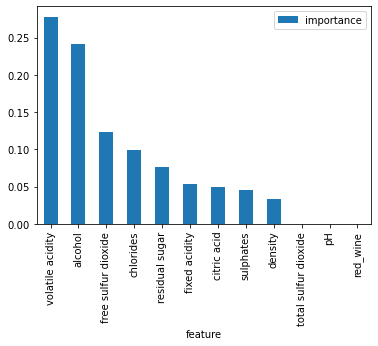

In [86]:
importances.plot.bar(x='feature')

### [Learning objective 3] Predict new observations

* **predict():** the cutpoint of predict() is 0.5. It's the only sensible threshold from a mathematical viewpoint.
* **predict_proba():** (p0,p1)

In [88]:
predictions = dtree.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
dtree.predict_proba(X_test[0:10])

array([[1.00000000e+00, 0.00000000e+00],
       [9.99090909e-01, 9.09090909e-04],
       [9.87096774e-01, 1.29032258e-02],
       [1.00000000e+00, 0.00000000e+00],
       [9.99090909e-01, 9.09090909e-04],
       [9.95815900e-01, 4.18410042e-03],
       [9.99090909e-01, 9.09090909e-04],
       [9.99090909e-01, 9.09090909e-04],
       [9.99090909e-01, 9.09090909e-04],
       [1.00000000e+00, 0.00000000e+00]])

In [30]:
y_pred = dtree.predict_proba(X_test[0:10])[:,1]
y_pred

array([0.        , 0.00090909, 0.01290323, 0.        , 0.00090909,
       0.0041841 , 0.00090909, 0.00090909, 0.00090909, 0.        ])

### [Learning objective 4] How to evaluate a classification decision tree model? How to code a gains table?

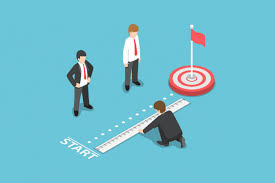


This is a classification problem. So we will use the following metrics.
* Confusion Matrix
* ROC Curve
* Gains Table
* Lift Curve
* Kolmogorov-Smirnov (K-S)

### (4.1) Confusion Matrix

In [173]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

predictions = dtree.predict(X_test[features])
print(accuracy_score(Y_test,predictions))

0.9716923076923077


In [174]:
np.count_nonzero(Y_test == 1)

47

In [175]:
confusion_matrix(Y_test,predictions)

array([[1571,    7],
       [  39,    8]], dtype=int64)

In [176]:
cm = pd.DataFrame(confusion_matrix(Y_test,predictions))
cm.rename(columns={0:'Predicted Low', 1:'Predicted High'},
         index = {0:'Actual Low',1:'Actual High'},inplace=True)
cm

,Predicted Low,Predicted High
Actual Low,1571,7
Actual High,39,8


### (4.2) ROC

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.8273130544993663

In [178]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 6.33713561e-04, 3.16856781e-03, 4.43599493e-03,
        4.43599493e-03, 6.33713561e-03, 1.07731305e-02, 1.26742712e-02,
        1.39416984e-02, 1.71102662e-02, 4.18250951e-02, 4.56273764e-02,
        5.19645120e-02, 6.02027883e-02, 6.27376426e-02, 8.68187579e-02,
        9.18884664e-02, 1.53358682e-01, 1.86311787e-01, 2.52217997e-01,
        3.23827630e-01, 3.63117871e-01, 4.08745247e-01, 8.59315589e-01,
        1.00000000e+00]),
 array([0.        , 0.08510638, 0.12765957, 0.14893617, 0.17021277,
        0.19148936, 0.19148936, 0.19148936, 0.23404255, 0.25531915,
        0.36170213, 0.38297872, 0.42553191, 0.42553191, 0.42553191,
        0.4893617 , 0.4893617 , 0.61702128, 0.65957447, 0.74468085,
        0.87234043, 0.91489362, 0.93617021, 0.93617021, 1.        ])]

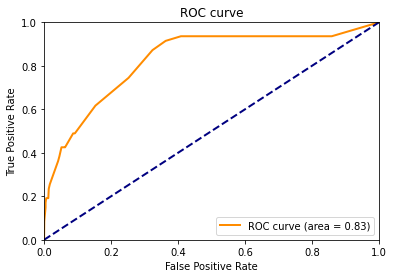

In [179]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### (4.3) Gains Table

* Click [here](https://towardsdatascience.com/how-to-determine-the-best-model-6b9c584d0db4) for more information

In [180]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = Y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
4337,1,1.0,0
1984,1,1.0,1
1983,1,1.0,2
347,0,1.0,3
4340,1,1.0,4


In [181]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

0    163
2    163
4    163
6    163
8    163
1    162
3    162
5    162
7    162
9    162
Name: decile, dtype: int64

In [182]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,163,23
1,162,8
2,163,6
3,162,6
4,163,1
5,162,0
6,163,0
7,162,0
8,163,2


In [183]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,163,23,140,163,23,140,0.49,0.09,4.7,4.89,40.0,14.11
1,162,8,154,325,31,294,0.66,0.19,9.4,3.30,47.0,9.54
2,163,6,157,488,37,451,0.79,0.29,14.1,2.62,50.0,7.58
3,162,6,156,650,43,607,0.91,0.38,18.8,2.29,53.0,6.62
4,163,1,162,813,44,769,0.94,0.49,23.5,1.87,45.0,5.41
5,162,0,162,975,44,931,0.94,0.59,28.2,1.56,35.0,4.51
6,163,0,163,1138,44,1094,0.94,0.69,32.9,1.34,25.0,3.87
7,162,0,162,1300,44,1256,0.94,0.80,37.6,1.17,14.0,3.38
8,163,2,161,1463,46,1417,0.98,0.90,42.3,1.09,8.0,3.14


<AxesSubplot:xlabel='decile'>

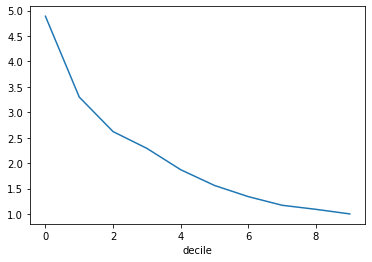

In [184]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains
gains['lift'].plot.line()

### (4.4) Cumulative Lift

<AxesSubplot:xlabel='decile'>

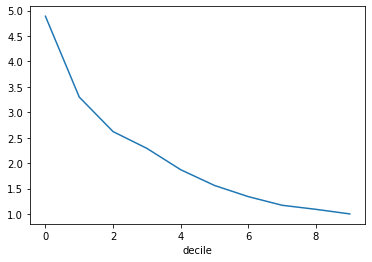

In [185]:
gains['lift'].plot.line()

<AxesSubplot:ylabel='actual'>

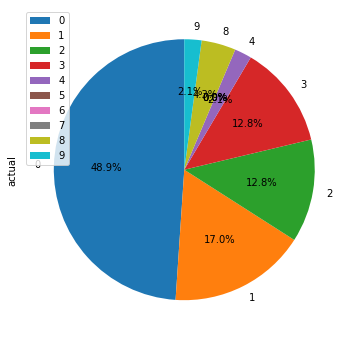

In [186]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

### (4.5) Komogorov-Smirnov (K-S)

<AxesSubplot:xlabel='decile'>

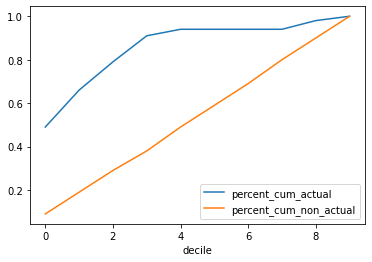

In [187]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()

In [188]:
gains['K_S'].max()

53.0

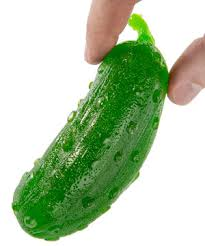


### [Learning objective 5] How to Apply the Model?

1. Save the model as a pickle file
2. Print out the "if...then" statements

### (5.1) Save the model as a pickle file

In [189]:
import pickle 
# save the model to disk
filename = path + '/winequalityN_model.sav'
pickle.dump(dtree, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.9716923076923077


In [190]:
predictions = loaded_model.predict_proba(X_test[1:10])
predictions[:,1]

array([0.00090909, 0.01290323, 0.        , 0.00090909, 0.0041841 ,
       0.00090909, 0.00090909, 0.00090909, 0.        ])

### (5.2) Print out the "if...then" statements

In [191]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print( "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print( "} else {" )
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}" )
                else:
                        print( "return " + str(value[node]) )

        recurse(left, right, threshold, features, 0)

In [192]:
get_code(dtree,X_train.columns)

if ( alcohol <= 11.674999713897705 ) {
if ( alcohol <= 10.989999771118164 ) {
if ( alcohol <= 8.949999809265137 ) {
if ( volatile acidity <= 0.20499999821186066 ) {
if ( chlorides <= 0.05550000071525574 ) {
if ( sulphates <= 0.7050000131130219 ) {
return [[17.  0.]]
} else {
return [[4. 1.]]
}
} else {
if ( residual sugar <= 13.799999713897705 ) {
return [[8. 0.]]
} else {
return [[ 0. 10.]]
}
}
} else {
if ( volatile acidity <= 0.21249999850988388 ) {
if ( pH <= 3.2350000143051147 ) {
return [[4. 1.]]
} else {
return [[7. 0.]]
}
} else {
return [[176.   0.]]
}
}
} else {
if ( alcohol <= 10.349999904632568 ) {
if ( volatile acidity <= 0.12249999865889549 ) {
if ( chlorides <= 0.04000000096857548 ) {
return [[4. 2.]]
} else {
return [[22.  0.]]
}
} else {
if ( free sulfur dioxide <= 3.5 ) {
return [[13.  1.]]
} else {
return [[2.198e+03 2.000e+00]]
}
}
} else {
if ( volatile acidity <= 0.1550000011920929 ) {
if ( volatile acidity <= 0.14500000327825546 ) {
return [[22.  0.]]
} else {
re

## [Learning objective 6] How to do Regression Tree with scikit-learn?


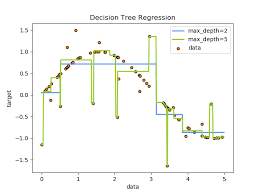

### (6.1) Not Just Classification, It Can Do Regression Too

* Although the preceding example works for the categorical target, the same concept applies to the case that the target variable is continuous  (regression).

* The regression tree method searches for every distinct values for your predictors and chooses to the split based on what minimize the SSE for the groups of dependent variables. For each group, the method will recursively split the predictor values within the groups.
* The curve to the right is a sine curve with some noisy. The decision tree method can fit it.

In [193]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(df_mean[features],
                                                    df_mean['quality'], 
                                                    random_state=0)

In [194]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model. 
rtree = DecisionTreeRegressor()

In [195]:
# Then, train the model.
rtree.fit(Xr_train,Yr_train)

DecisionTreeRegressor()

In [196]:
yr_pred = rtree.predict(Xr_test)
yr_pred

array([6., 5., 6., ..., 5., 6., 5.])

In [197]:
pd.crosstab(Yr_test,yr_pred)

col_0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
quality,,,,,,,
3,0,1,5,0,0,1,0
4,2,14,16,24,3,0,0
5,1,14,370,144,21,3,0
6,2,13,134,420,106,15,1
7,1,2,16,92,144,13,0
8,0,1,0,10,10,26,0


###  [Learning objective 7] How to Evaluate a Regression Tree Model?

### (7.1) Mean Absolute Error


<img style = "float: left" src = "https://i.imgur.com/BmBC8VW.jpg" width = 400>

In [198]:
# MEan Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,y_pred)

0.05107232147343564

### (7.2) Root Mean Squared Error

<img style = "float: left" src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdupAS5XRb5uUc5ElU-zAwC4aezxM-J6JxchtrClbhxiB329K9" width = 300>

In [199]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,y_pred))
rmse

0.16553990389774967

### (7.3) Gains Table

In [200]:
gains = gains_table(Y_test,y_pred)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,163,23,140,163,23,140,0.49,0.09,4.7,4.89,40.0,14.11
1,162,8,154,325,31,294,0.66,0.19,9.4,3.30,47.0,9.54
2,163,6,157,488,37,451,0.79,0.29,14.1,2.62,50.0,7.58
3,162,6,156,650,43,607,0.91,0.38,18.8,2.29,53.0,6.62
4,163,1,162,813,44,769,0.94,0.49,23.5,1.87,45.0,5.41
5,162,0,162,975,44,931,0.94,0.59,28.2,1.56,35.0,4.51
6,163,0,163,1138,44,1094,0.94,0.69,32.9,1.34,25.0,3.87
7,162,0,162,1300,44,1256,0.94,0.80,37.6,1.17,14.0,3.38
8,163,2,161,1463,46,1417,0.98,0.90,42.3,1.09,8.0,3.14


### [Learning objective 8] How to Prune a Tree with scikit-learn?


<img style = "float: right" src = "https://na.rdcpix.com/1162715347/e7baeacffee094b5d79c2ec1708c500ew-c0xd-w685_h860_q80.jpg" width = 400>

* Generally it is preferred to have a simple model which avoids overfitting issue. Any additional split that does not add significant value is not worth while. 
* We can avoid overfitting by changing the hyper-parameters.
* See [Learning objective 2] for the hyper-parameters

### [Learning objective 10] Understand 'gini' and 'entropy'

### (10.1) Gini

* Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.
* If 100% of the observations belong to one class, it can be called "pure". The degree of Gini index varies between 0 and 1, where 0 denotes that all observations belong to one class. A gini Index of 0.5 means half of the observations are in one class, and the other half belong to another class.

If we have two classes in the target variable and $P_i$ is the probability of picking a data point of class $i$, the Gini Impurity is calculated as:

\begin{align*}
G = \sum_{i=1}^{2} P_i * (1-P_i)
\end{align*}

Example 1: Suppose we have a perfect split where the left branch has only blues and the right branch has only greens. The Gini Impurity is:

\begin{align*}
G_{left} = 1 * ( 1 - 1 ) +  0 * ( 1 - 0) = 0
\end{align*}


\begin{align*}
G_{right} = 0 * ( 1 - 0 ) +  1 * ( 1 - 1) = 0
\end{align*}

<img style = "float: center" src = "https://victorzhou.com/0a81728a87e7cf55cf58a653f9c210c5/dataset.svg" width = 200>

Example 2: Suppose we have an imperfect split where the right branch has one blue and five greens. The Gini Impurity is:

\begin{align*}
G_{left} = 1 * ( 1 - 1 ) +  0 * ( 1 - 0) = 0
\end{align*}


\begin{align*}
G_{right} = \frac{1}{6} + ( 1 - \frac{1}{6} ) + \frac{5}{6} * (1-\frac{5}{6} ) = \frac{5}{18} = 0.278
\end{align*}

<img style = "float: center" src = "https://victorzhou.com/4768c79349a62634d54ce531b3680751/dataset-imperfect-split.svg" width = 200>


### (10.2) Cross-Entropy

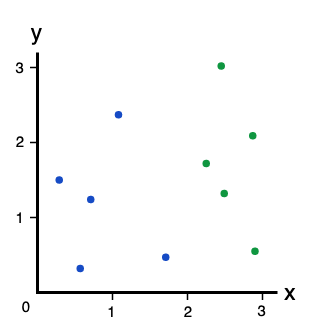


\begin{align*}
E = - \sum_{i=1}^{2} P_{i} log_{2} ( P_{i} )
\end{align*}

Example 1: Suppose we have a perfect split where the left branch has only blues and the right branch has only greens. The Gini Impurity is:

\begin{align*}
G_{left} = 1 * log_2 ( 1 ) +  0 * log_2 ( 1 ) = 0
\end{align*}


\begin{align*}
G_{right} = 0 * log_2 ( 1 ) +  1 * log_2 ( 1 ) = 0
\end{align*}



<img style = "float: center" src = "https://victorzhou.com/0a81728a87e7cf55cf58a653f9c210c5/dataset.svg" width = 200>

Example 2: Suppose we have an imperfect split where the right branch has one blue and five greens. The Gini Impurity is:

\begin{align*}
G_{left} = 1 * log_2 ( 1 - 1 ) +  0 * log_2 ( 1 - 0) = 0
\end{align*}


\begin{align*}
G_{right} = \frac{1}{6} + ( 1 - \frac{1}{6} ) + \frac{5}{6} * (1-\frac{5}{6} ) = \frac{5}{18} = 0.278
\end{align*}

<img style = "float: center" src = "https://victorzhou.com/4768c79349a62634d54ce531b3680751/dataset-imperfect-split.svg" width = 200>


### [Learning objective 11] Build a logistic regression with scikit-learn


In [201]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000) 
logistic_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### [Learning objective 12] How to predict with a logistic regression?
- It is the same as the above tree model


In [202]:
logistic_model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [203]:
logistic_model.predict_proba(X_test[0:10])

array([[0.98953229, 0.01046771],
       [0.99730883, 0.00269117],
       [0.97413782, 0.02586218],
       [0.99837964, 0.00162036],
       [0.99359613, 0.00640387],
       [0.93490357, 0.06509643],
       [0.99749277, 0.00250723],
       [0.9988481 , 0.0011519 ],
       [0.9929634 , 0.0070366 ],
       [0.99162802, 0.00837198]])

In [204]:
logistic_model.score(X_test, Y_test)

0.9704615384615385